In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
df=load_breast_cancer()

In [20]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
print(df["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [22]:
x_train=pd.DataFrame(df["data"],columns=df["feature_names"])

In [23]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

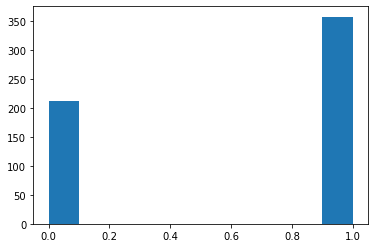

In [29]:
plt.hist(df["target"])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df["data"],df["target"],test_size=0.3,random_state=101)

In [35]:
from sklearn.svm import SVC

In [60]:
svm_model=SVC(C=0.7,gamma=0.001)

In [61]:
svm_model.fit(x_train,y_train)

SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
predictions=svm_model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
print(confusion_matrix(y_test,predictions))

[[59  7]
 [ 6 99]]


In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        66
           1       0.93      0.94      0.94       105

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [43]:
from sklearn.model_selection import GridSearchCV

In [56]:
param={ "C":[0.1,0.7,0.8,0.9,1,10,100,1000],"gamma":[1,0.1,0.01,0.02,0.03,0.04,0.05,0.001]}

In [57]:
grid=GridSearchCV(SVC(),param,verbose=3)

In [58]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.02 ...............................................
[CV] ................... C=0.1, gamma=0.02, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.02 ...............................................
[CV] ................... C=0.1, gamma=0.02, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.02 ...............................................
[CV] .

[CV] ................... C=0.7, gamma=0.05, score=0.633, total=   0.0s
[CV] C=0.7, gamma=0.05 ...............................................
[CV] ................... C=0.7, gamma=0.05, score=0.633, total=   0.0s
[CV] C=0.7, gamma=0.001 ..............................................
[CV] .................. C=0.7, gamma=0.001, score=0.900, total=   0.0s
[CV] C=0.7, gamma=0.001 ..............................................
[CV] .................. C=0.7, gamma=0.001, score=0.925, total=   0.0s
[CV] C=0.7, gamma=0.001 ..............................................
[CV] .................. C=0.7, gamma=0.001, score=0.925, total=   0.0s
[CV] C=0.7, gamma=0.001 ..............................................
[CV] .................. C=0.7, gamma=0.001, score=0.962, total=   0.0s
[CV] C=0.7, gamma=0.001 ..............................................
[CV] .................. C=0.7, gamma=0.001, score=0.937, total=   0.0s
[CV] C=0.8, gamma=1 ..................................................
[CV] .

[CV] ................... C=0.9, gamma=0.02, score=0.633, total=   0.0s
[CV] C=0.9, gamma=0.02 ...............................................
[CV] ................... C=0.9, gamma=0.02, score=0.633, total=   0.0s
[CV] C=0.9, gamma=0.03 ...............................................
[CV] ................... C=0.9, gamma=0.03, score=0.637, total=   0.0s
[CV] C=0.9, gamma=0.03 ...............................................
[CV] ................... C=0.9, gamma=0.03, score=0.637, total=   0.0s
[CV] C=0.9, gamma=0.03 ...............................................
[CV] ................... C=0.9, gamma=0.03, score=0.625, total=   0.0s
[CV] C=0.9, gamma=0.03 ...............................................
[CV] ................... C=0.9, gamma=0.03, score=0.633, total=   0.0s
[CV] C=0.9, gamma=0.03 ...............................................
[CV] ................... C=0.9, gamma=0.03, score=0.633, total=   0.0s
[CV] C=0.9, gamma=0.04 ...............................................
[CV] .

[CV] ....................... C=10, gamma=1, score=0.637, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.637, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.625, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.633, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.633, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.637, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.637, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[CV] ................... C=100, gamma=0.03, score=0.633, total=   0.0s
[CV] C=100, gamma=0.03 ...............................................
[CV] ................... C=100, gamma=0.03, score=0.633, total=   0.0s
[CV] C=100, gamma=0.04 ...............................................
[CV] ................... C=100, gamma=0.04, score=0.637, total=   0.0s
[CV] C=100, gamma=0.04 ...............................................
[CV] ................... C=100, gamma=0.04, score=0.637, total=   0.0s
[CV] C=100, gamma=0.04 ...............................................
[CV] ................... C=100, gamma=0.04, score=0.625, total=   0.0s
[CV] C=100, gamma=0.04 ...............................................
[CV] ................... C=100, gamma=0.04, score=0.633, total=   0.0s
[CV] C=100, gamma=0.04 ...............................................
[CV] ................... C=100, gamma=0.04, score=0.633, total=   0.0s
[CV] C=100, gamma=0.05 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    6.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.7, 0.8, 0.9, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
grid.best_params_

{'C': 0.7, 'gamma': 0.001}